# Este Notebook esta enfocado en el modelo de clasificación de KNeighborsClassifier

In [3]:
# 🔌 Cargar la extensión de Kedro en Jupyter
%load_ext kedro.ipython
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [6]:
df = catalog.load("Features_training_v1")   # lee el dataset del catálogo
list(df.columns)  

[10/23/25 20:59:59] INFO     Loading data from Features_training_v1 (ParquetDataset)...        ]8;id=643291;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=298686;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\


[
    'TransactionID',
    'CustomerID',
    'CustLocation',
    'TransactionDate',
    'TransactionTime',
    'TransactionAmount (INR)',
    'avg_spent',
    'first_txn_date',
    'last_txn_date',
    'RFM Score',
    'Segment_Final',
    'DayOfWeek',
    'IsWeekend',
    'IsLateNight',
    'TimeOfDay',
    'AmountZScoreByLocation',
    'TimeSinceLastTxn',
    'RiskScore',
    'IsAnomaly',
    'is_fraud'
]

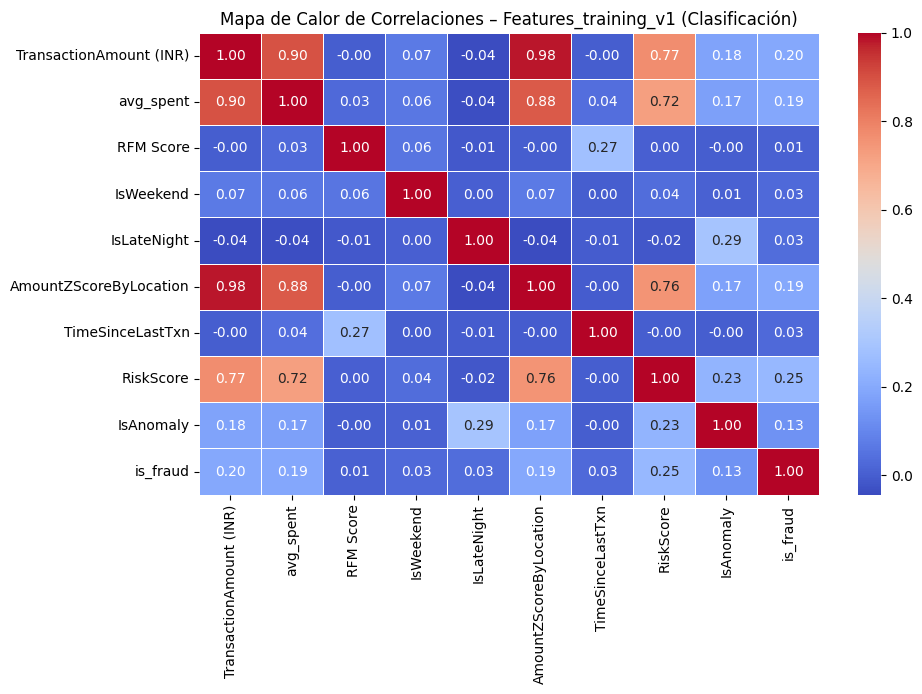

In [5]:
# === Calcular matriz de correlación ===
corr = df.corr(numeric_only=True)

# === Crear el mapa de calor ===
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Mapa de Calor de Correlaciones – Features_training_v1 (Clasificación)")
plt.show()